In [ ]:
!pip install roboflow

from google.colab import drive
drive.mount('/content/drive')

from roboflow import Roboflow
rf = Roboflow(api_key="IwbjvxFzcbBgxgAJv6M2")
project = rf.workspace("aslvsbsl").project("aslvbsl")
version = project.version(2)
dataset = version.download("folder")

dataset_path = dataset.location

train_dir = f'{dataset_path}/train'
valid_dir = f'{dataset_path}/valid'
test_dir = f'{dataset_path}/test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
loading Roboflow workspace...
loading Roboflow project...


Found 3840 images belonging to 48 classes.
Found 672 images belonging to 48 classes.
Found 1248 images belonging to 48 classes.
Epoch 1/20
60/60 [==============================] - 152s 2s/step - loss: 6.9483 - accuracy: 0.6451 - val_loss: 5.2804 - val_accuracy: 0.6797 - lr: 0.0010
Epoch 2/20
60/60 [==============================] - 145s 2s/step - loss: 3.6268 - accuracy: 0.8943 - val_loss: 3.2113 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 3/20
60/60 [==============================] - 149s 2s/step - loss: 2.3002 - accuracy: 0.9234 - val_loss: 2.1266 - val_accuracy: 0.8703 - lr: 0.0010
Epoch 4/20
60/60 [==============================] - 151s 3s/step - loss: 1.5867 - accuracy: 0.9328 - val_loss: 1.6400 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 5/20
60/60 [==============================] - 150s 2s/step - loss: 1.1560 - accuracy: 0.9458 - val_loss: 1.4213 - val_accuracy: 0.8094 - lr: 0.0010
Epoch 6/20
60/60 [==============================] - 145s 2s/step - loss: 0.9126 - accuracy: 0.9456 - v

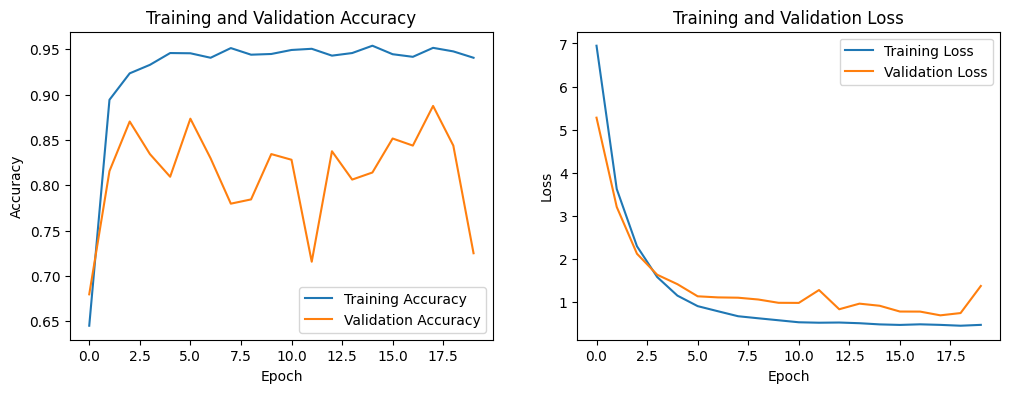

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

img_height, img_width = 160, 160
batch_size = 64
epochs = 20
num_classes = 48

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Directory {train_dir} does not exist.")
if not os.path.exists(valid_dir):
    raise FileNotFoundError(f"Directory {valid_dir} does not exist.")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Directory {test_dir} does not exist.")

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr]
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.2f}')

model.save('/content/drive/My Drive/cnn_model_transfer_learning.h5')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 3840 images belonging to 48 classes.
Found 672 images belonging to 48 classes.
Found 1248 images belonging to 48 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
60/60 [==============================] - 158s 3s/step - loss: 1.4116 - accuracy: 0.6367 - val_loss: 1.0174 - val_accuracy: 0.6859 - lr: 0.0010
Epoch 2/20
60/60 [==============================] - 155s 3s/step - loss: 0.3677 - accuracy: 0.8911 - val_loss: 0.6211 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 3/20
60/60 [==============================] - 148s 2s/step - loss: 0.2547 - accuracy: 0.9242 - val_loss: 0.5443 - val_accuracy: 0.8188 - lr: 0.0010
Epoch 4/20
60/60 [==============================] - 148s 2s/step - loss: 0.1968 - accuracy: 0.9430 - val_loss: 0.4536 - val_accuracy: 0.8609 - lr: 0.0010
Epoch 5/20
60/60 [==============================] - 149s 2s/step - loss: 0.1487 - accuracy: 0.9596 - val_loss: 0.3994 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 6/20
60/60 [=====================

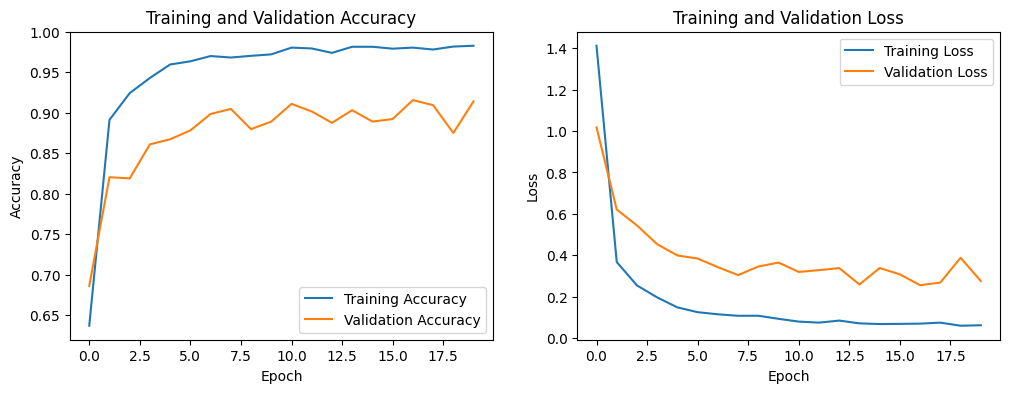

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

img_height, img_width = 160, 160
batch_size = 64
epochs = 20
num_classes = 48

if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Directory {train_dir} does not exist.")
if not os.path.exists(valid_dir):
    raise FileNotFoundError(f"Directory {valid_dir} does not exist.")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Directory {test_dir} does not exist.")

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr]
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.2f}')

model.save('/content/drive/My Drive/cnn_model_transfer_learning.h5')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 3840 images belonging to 48 classes.
Found 672 images belonging to 48 classes.
Found 1248 images belonging to 48 classes.
Epoch 1/20
60/60 [==============================] - 156s 3s/step - loss: 3.8137 - accuracy: 0.1349 - val_loss: 2.8318 - val_accuracy: 0.2953 - lr: 1.0000e-04
Epoch 2/20
60/60 [==============================] - 147s 2s/step - loss: 2.1356 - accuracy: 0.4138 - val_loss: 1.8424 - val_accuracy: 0.6203 - lr: 1.0000e-04
Epoch 3/20
60/60 [==============================] - 172s 3s/step - loss: 1.3803 - accuracy: 0.6148 - val_loss: 1.2624 - val_accuracy: 0.7531 - lr: 1.0000e-04
Epoch 4/20
60/60 [==============================] - 152s 3s/step - loss: 0.9986 - accuracy: 0.7281 - val_loss: 0.9345 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 5/20
60/60 [==============================] - 151s 3s/step - loss: 0.8253 - accuracy: 0.7698 - val_loss: 0.7454 - val_accuracy: 0.8359 - lr: 1.0000e-04
Epoch 6/20
60/60 [==============================] - 144s 2s/step - loss: 0.6677 - 

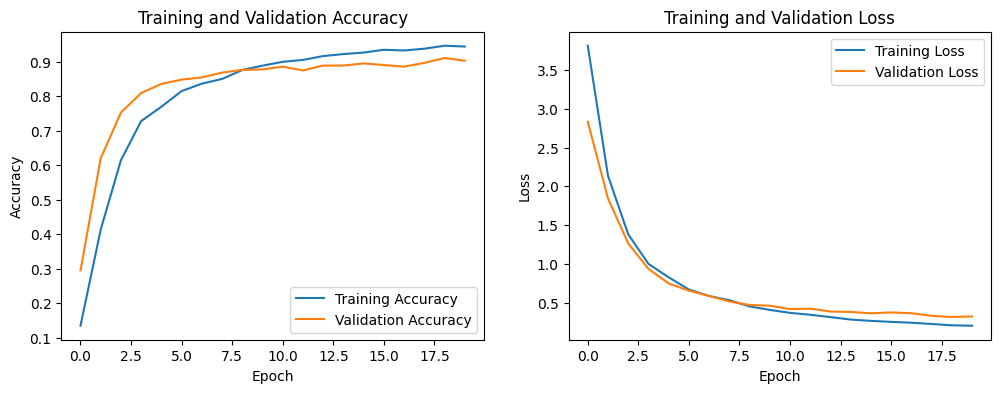

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os

img_height, img_width = 160, 160
batch_size = 64
epochs = 20
num_classes = 48

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size
test_steps = test_generator.samples // batch_size

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print(f'Test accuracy: {test_acc:.2f}')

model.save('/content/drive/My Drive/cnn_model_transfer_learning2.h5')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Found 3840 images belonging to 48 classes.
Found 672 images belonging to 48 classes.
Found 1248 images belonging to 48 classes.
Epoch 1/30
60/60 [==============================] - 73s 1s/step - loss: 3.8103 - accuracy: 0.1424 - val_loss: 2.7326 - val_accuracy: 0.3328 - lr: 1.0000e-04
Epoch 2/30
60/60 [==============================] - 68s 1s/step - loss: 2.0699 - accuracy: 0.4307 - val_loss: 1.7684 - val_accuracy: 0.6062 - lr: 1.0000e-04
Epoch 3/30
60/60 [==============================] - 59s 982ms/step - loss: 1.4068 - accuracy: 0.6122 - val_loss: 1.2165 - val_accuracy: 0.7156 - lr: 1.0000e-04
Epoch 4/30
60/60 [==============================] - 66s 1s/step - loss: 1.0477 - accuracy: 0.7065 - val_loss: 0.9130 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 5/30
60/60 [==============================] - 60s 1s/step - loss: 0.8318 - accuracy: 0.7750 - val_loss: 0.7656 - val_accuracy: 0.7953 - lr: 1.0000e-04
Epoch 6/30
60/60 [==============================] - 66s 1s/step - loss: 0.6778 - acc

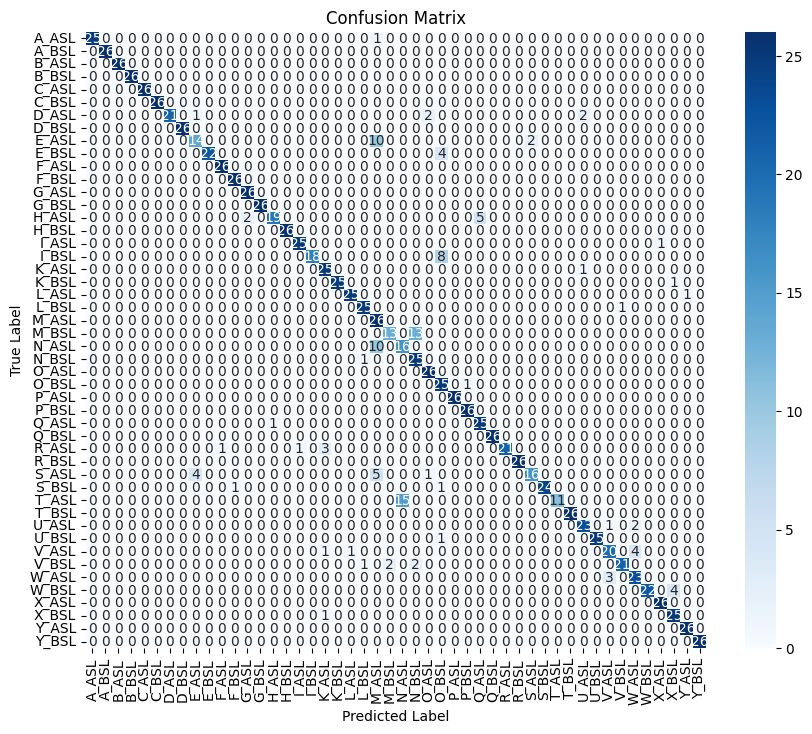

              precision    recall  f1-score   support

       A_ASL       1.00      0.96      0.98        26
       A_BSL       1.00      1.00      1.00        26
       B_ASL       1.00      1.00      1.00        26
       B_BSL       1.00      1.00      1.00        26
       C_ASL       1.00      1.00      1.00        26
       C_BSL       1.00      1.00      1.00        26
       D_ASL       1.00      0.81      0.89        26
       D_BSL       1.00      1.00      1.00        26
       E_ASL       0.74      0.54      0.62        26
       E_BSL       1.00      0.85      0.92        26
       F_ASL       0.96      1.00      0.98        26
       F_BSL       0.96      1.00      0.98        26
       G_ASL       0.93      1.00      0.96        26
       G_BSL       1.00      1.00      1.00        26
       H_ASL       0.95      0.73      0.83        26
       H_BSL       1.00      1.00      1.00        26
       I_ASL       0.96      0.96      0.96        26
       I_BSL       1.00    

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


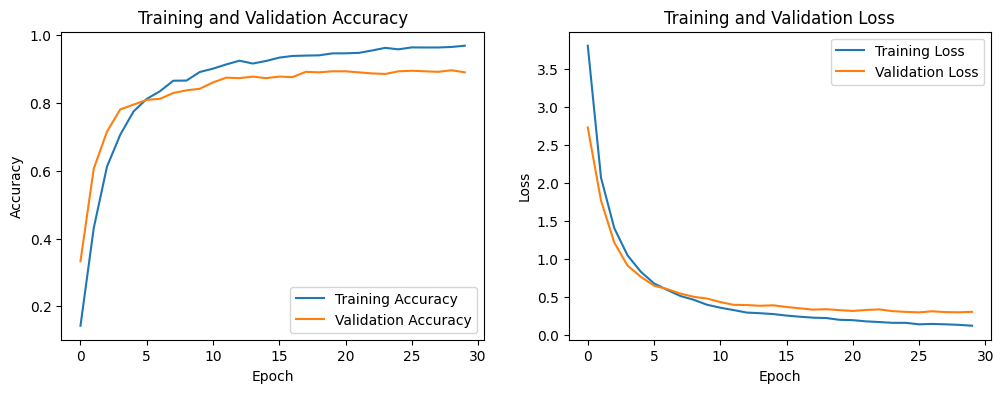

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

img_height, img_width = 160, 160
batch_size = 64
epochs = 30
num_classes = 48

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size
test_steps = test_generator.samples // batch_size

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print(f'Test accuracy: {test_acc:.2f}')

test_generator.reset()
preds = model.predict(test_generator, steps=test_generator.samples // batch_size + 1, verbose=1)
predicted_classes = np.argmax(preds, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

predicted_classes = predicted_classes[:len(true_classes)]

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

model.save('/content/drive/My Drive/cnn_model_transfer_learning2.h5')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 1s 813ms/step
Image: /content/drive/My Drive/Word/Ciao_ASL/1.jpg, Predicted Class: C_ASL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Ciao_ASL/2.jpg, Predicted Class: I_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Ciao_ASL/3.jpg, Predicted Class: A_ASL
1/1 [==============================] - 0s 25ms/step
Image: /content/drive/My Drive/Word/Ciao_ASL/4.jpg, Predicted Class: O_ASL
Predicted Word: CIAO, Language: ASL


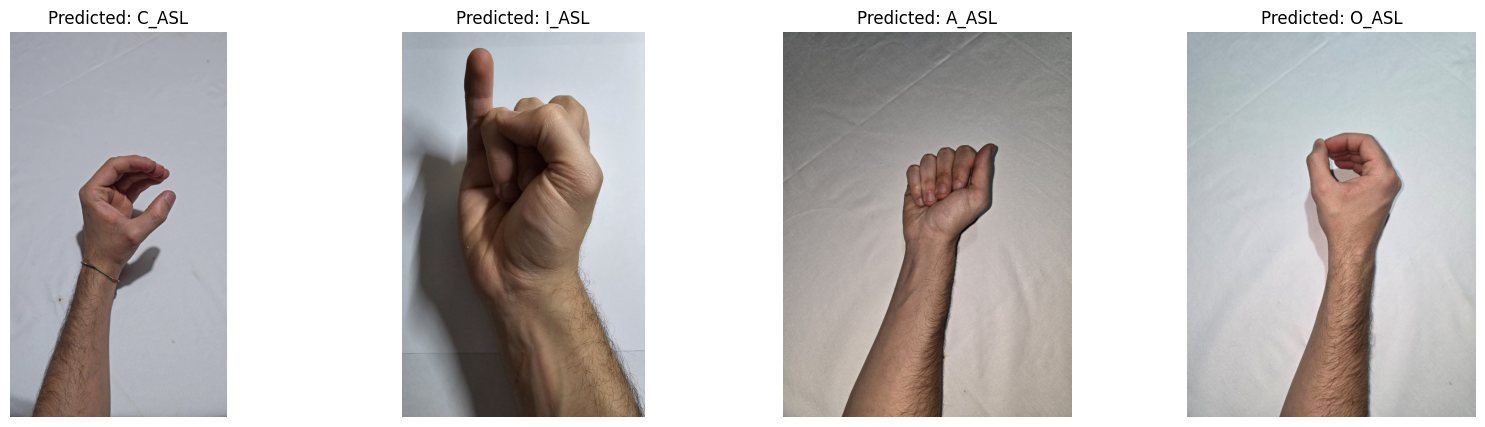

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Ciao_ASL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 5):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = image.load_img(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 1s 1s/step
Image: /content/drive/My Drive/Word/Ciao_BSL/1.jpg, Predicted Class: C_BSL
1/1 [==============================] - 0s 37ms/step
Image: /content/drive/My Drive/Word/Ciao_BSL/2.jpg, Predicted Class: I_BSL
1/1 [==============================] - 0s 38ms/step
Image: /content/drive/My Drive/Word/Ciao_BSL/3.jpg, Predicted Class: A_BSL
1/1 [==============================] - 0s 35ms/step
Image: /content/drive/My Drive/Word/Ciao_BSL/4.jpg, Predicted Class: O_BSL
Predicted Word: CIAO, Language: BSL


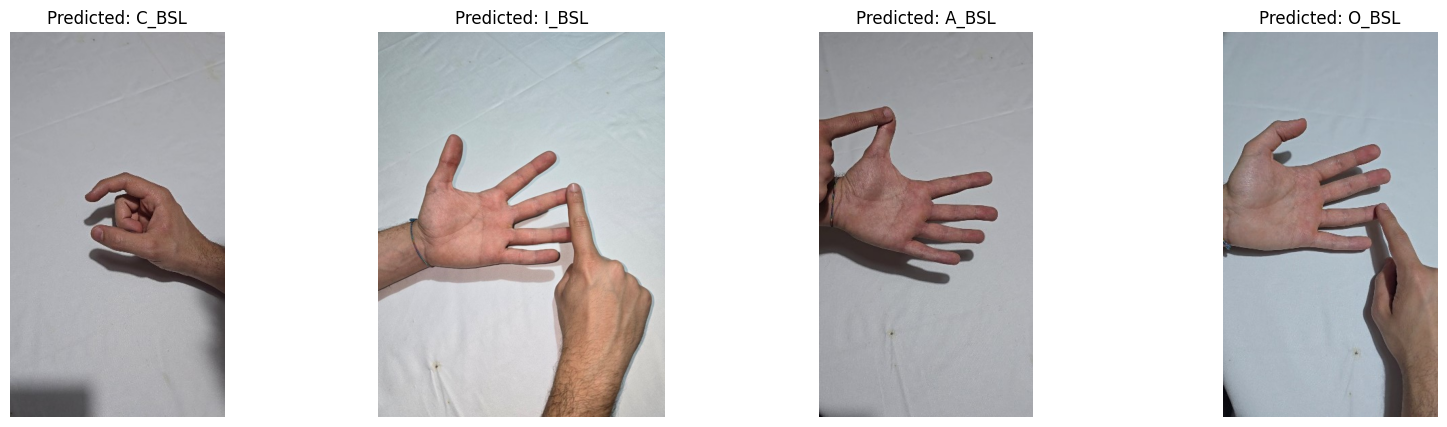

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Ciao_BSL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 5):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = image.load_img(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 1s 826ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/1.jpg, Predicted Class: A_ASL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/2.jpg, Predicted Class: L_ASL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/3.jpg, Predicted Class: E_ASL
1/1 [==============================] - 0s 27ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/4.jpg, Predicted Class: E_ASL
1/1 [==============================] - 0s 22ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/5.jpg, Predicted Class: V_ASL
1/1 [==============================] - 0s 22ms/step
Image: /content/drive/My Drive/Word/Albero_ASL/6.jpg, Predicted Class: O_ASL
Predicted Word: ALEEVO, Language: ASL


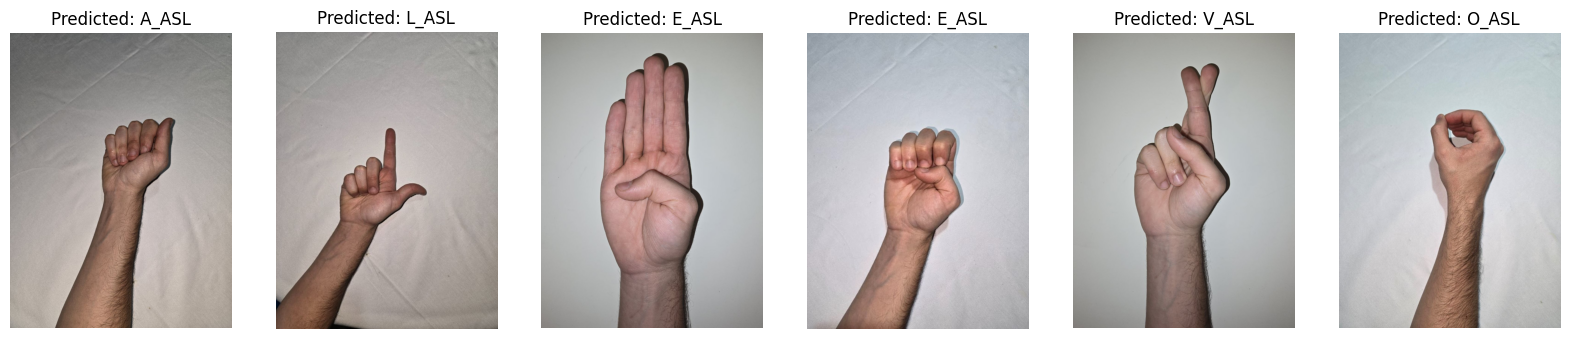

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Albero_ASL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 7):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 1s 1s/step
Image: /content/drive/My Drive/Word/Albero_BSL/1.jpg, Predicted Class: A_BSL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Albero_BSL/2.jpg, Predicted Class: L_BSL
1/1 [==============================] - 0s 25ms/step
Image: /content/drive/My Drive/Word/Albero_BSL/3.jpg, Predicted Class: B_BSL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Albero_BSL/4.jpg, Predicted Class: E_BSL
1/1 [==============================] - 0s 22ms/step
Image: /content/drive/My Drive/Word/Albero_BSL/5.jpg, Predicted Class: R_BSL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Albero_BSL/6.jpg, Predicted Class: O_BSL
Predicted Word: ALBERO, Language: BSL


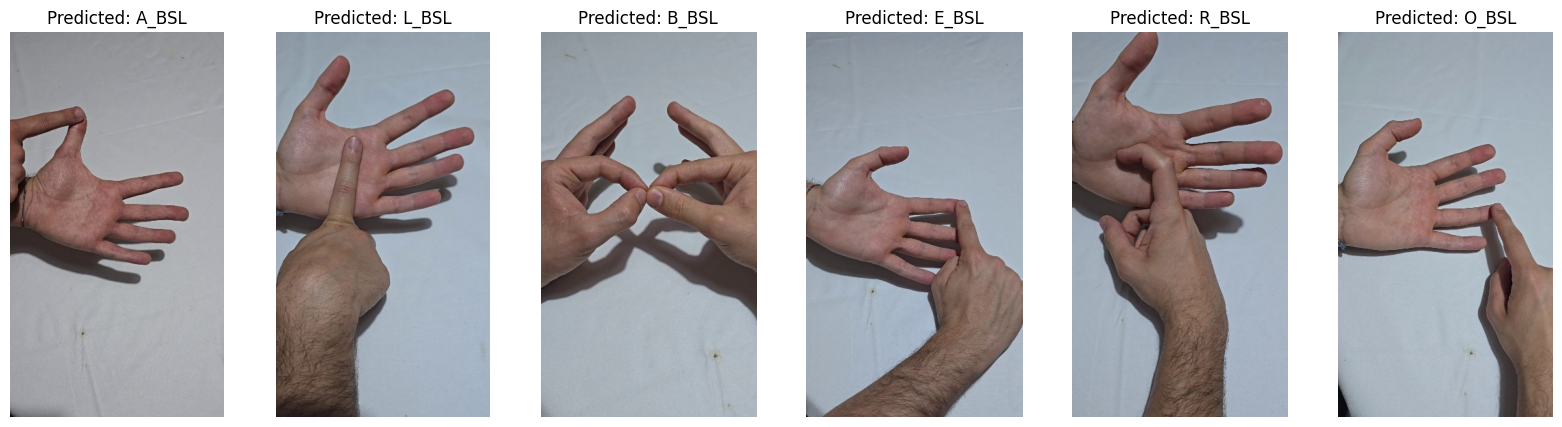

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Albero_BSL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 7):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()

1/1 [==============================] - 1s 795ms/step
Image: /content/drive/My Drive/Word/Mento_ASL/1.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_ASL/2.jpg, Predicted Class: E_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_ASL/3.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_ASL/4.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_ASL/5.jpg, Predicted Class: O_ASL
Predicted Word: MEMMO, Language: ASL


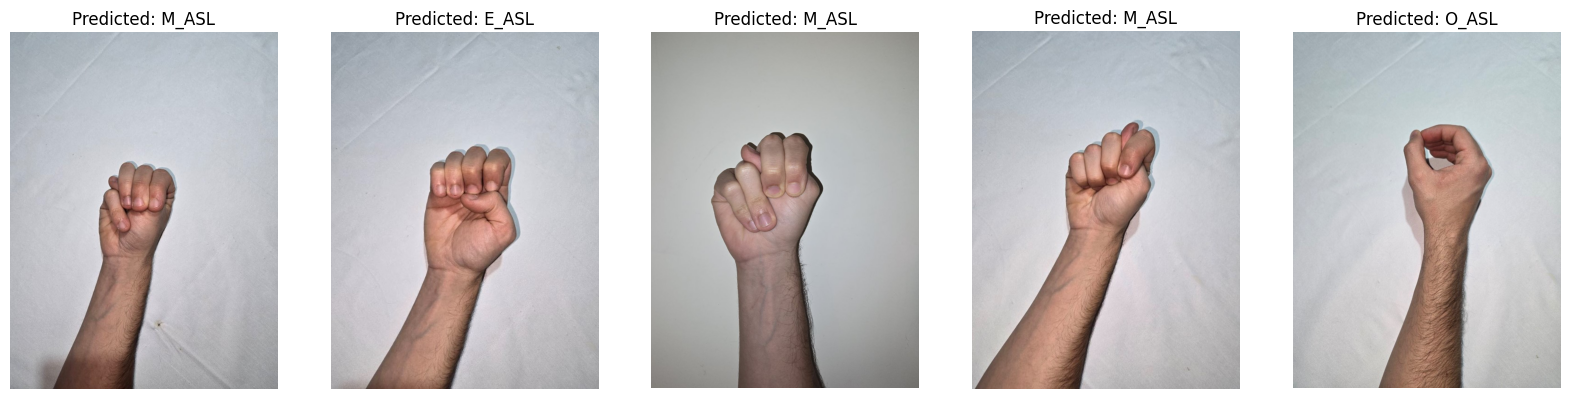

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Mento_ASL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 6):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step
Image: /content/drive/My Drive/Word/Mento_BSL/1.jpg, Predicted Class: M_BSL
1/1 [==============================] - 0s 28ms/step
Image: /content/drive/My Drive/Word/Mento_BSL/2.jpg, Predicted Class: E_BSL
1/1 [==============================] - 0s 27ms/step
Image: /content/drive/My Drive/Word/Mento_BSL/3.jpg, Predicted Class: M_BSL
1/1 [==============================] - 0s 26ms/step
Image: /content/drive/My Drive/Word/Mento_BSL/4.jpg, Predicted Class: T_BSL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_BSL/5.jpg, Predicted Class: O_BSL
Predicted Word: MEMTO, Language: BSL


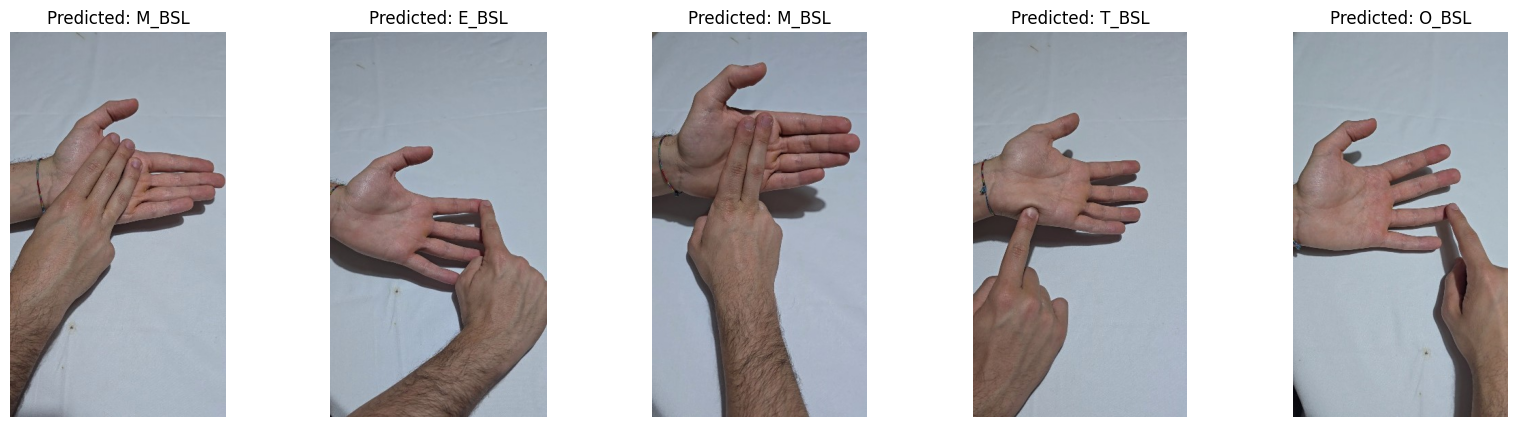

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Mento_BSL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']


class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 6):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 1s 753ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed/1.jpg, Predicted Class: M_BSL
1/1 [==============================] - 0s 23ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed/2.jpg, Predicted Class: E_ASL
1/1 [==============================] - 0s 20ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed/3.jpg, Predicted Class: M_BSL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed/4.jpg, Predicted Class: T_ASL
1/1 [==============================] - 0s 21ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed/5.jpg, Predicted Class: O_BSL
Predicted Word: MEMTO, Language: Mixed


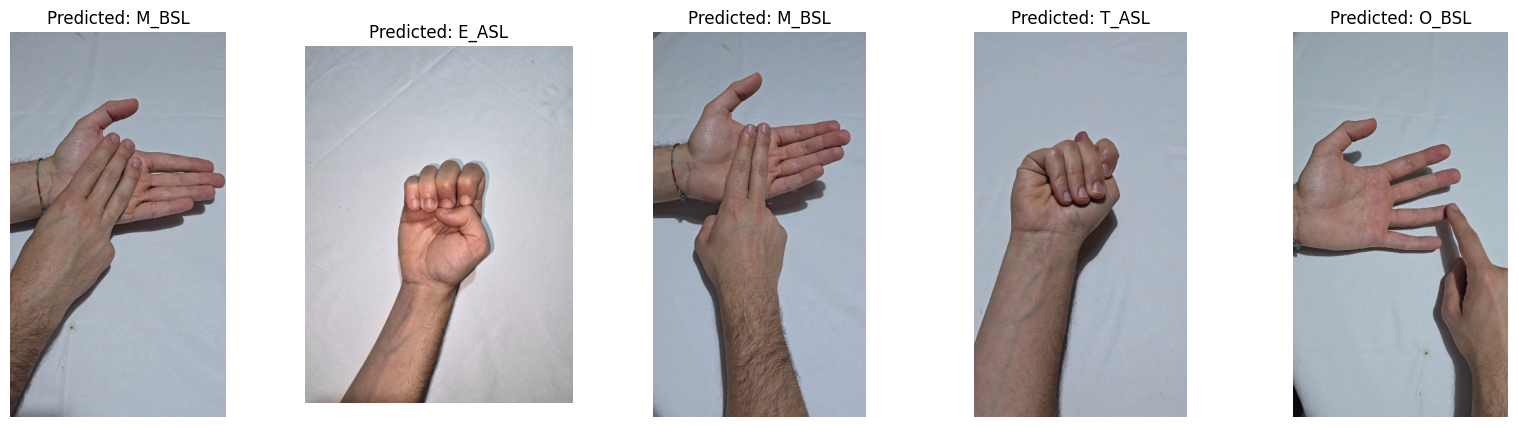

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Mento_Mixed/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 6):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 3s 3s/step
Image: /content/drive/My Drive/Word/Mento_Mixed_2/1.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 193ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed_2/2.jpg, Predicted Class: E_BSL
1/1 [==============================] - 0s 173ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed_2/3.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 118ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed_2/4.jpg, Predicted Class: T_BSL
1/1 [==============================] - 0s 158ms/step
Image: /content/drive/My Drive/Word/Mento_Mixed_2/5.jpg, Predicted Class: O_ASL
Predicted Word: MEMTO, Language: Mixed


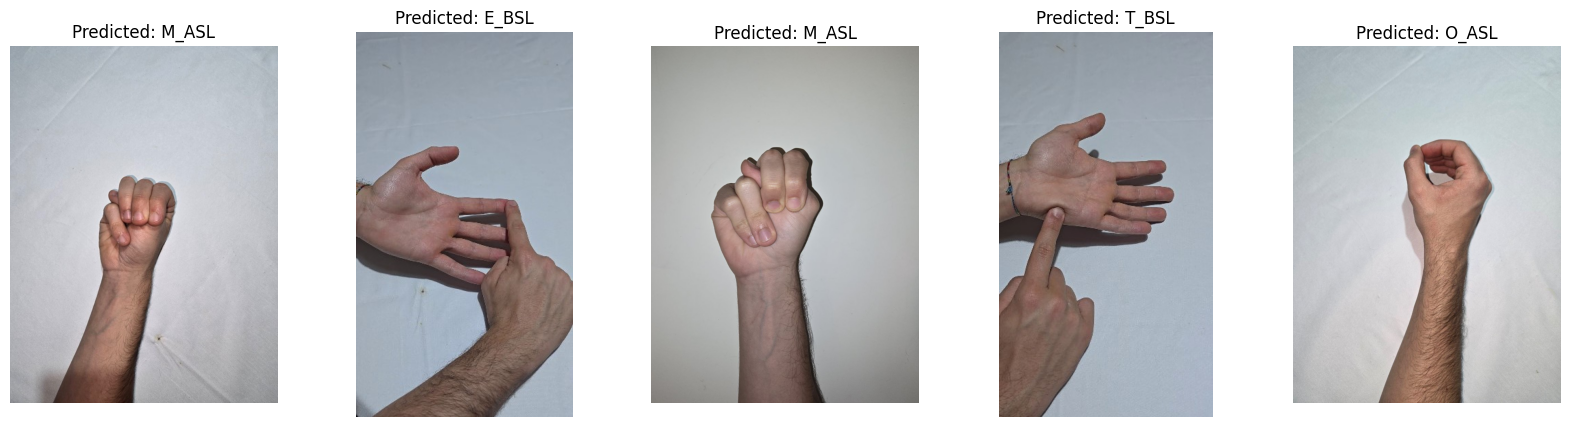

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image, ExifTags

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/Mento_Mixed_2/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = Image.open(img_path)

    for orientation in ExifTags.TAGS.keys():
        if ExifTags.TAGS[orientation] == 'Orientation':
            break
    try:
        exif = dict(img._getexif().items())
        if exif[orientation] == 3:
            img = img.rotate(180, expand=True)
        elif exif[orientation] == 6:
            img = img.rotate(270, expand=True)
        elif exif[orientation] == 8:
            img = img.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 6):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = Image.open(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 1s 972ms/step
Image: /content/drive/My Drive/Word/A_BSL/1.jpeg, Predicted Class: T_BSL
1/1 [==============================] - 0s 42ms/step
Image: /content/drive/My Drive/Word/A_BSL/2.jpeg, Predicted Class: A_BSL
1/1 [==============================] - 0s 54ms/step
Image: /content/drive/My Drive/Word/A_BSL/3.jpeg, Predicted Class: A_BSL
Predicted Word: TAA, Language: BSL


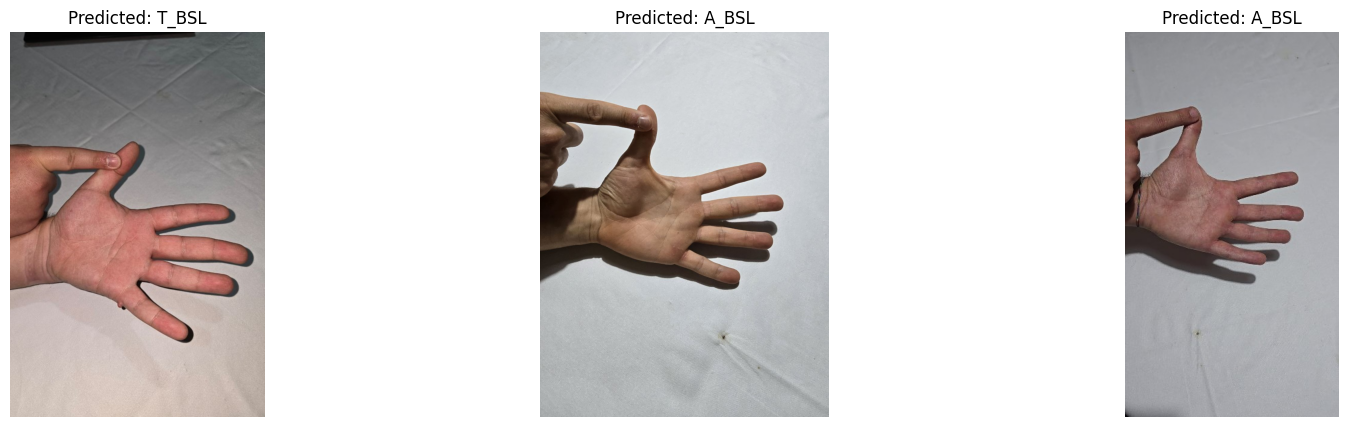

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/A_BSL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 4):
    img_path = os.path.join(image_dir, f'{i}.jpeg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = image.load_img(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()


1/1 [==============================] - 2s 2s/step
Image: /content/drive/My Drive/Word/E_ASL/1.jpg, Predicted Class: M_ASL
1/1 [==============================] - 0s 42ms/step
Image: /content/drive/My Drive/Word/E_ASL/2.jpg, Predicted Class: E_ASL
1/1 [==============================] - 0s 44ms/step
Image: /content/drive/My Drive/Word/E_ASL/3.jpg, Predicted Class: E_ASL
Predicted Word: MEE, Language: ASL


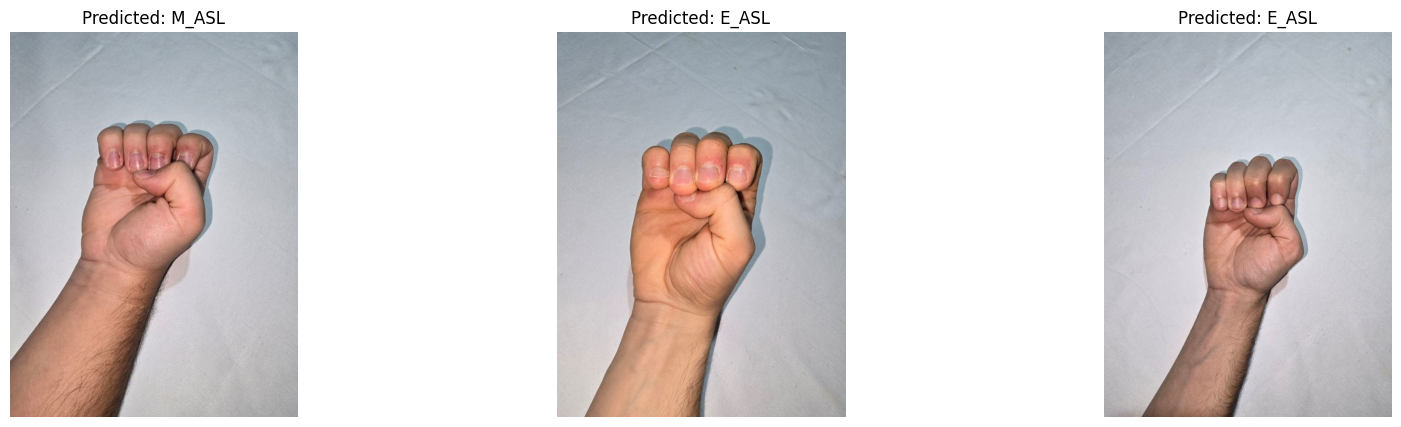

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

model_path = '/content/drive/My Drive/cnn_model_transfer_learning2.h5'
model = load_model(model_path)

image_dir = '/content/drive/My Drive/Word/E_ASL/'

def preprocess_image(img_path, target_size=(160, 160)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

class_labels_list = ['A_ASL', 'A_BSL', 'B_ASL', 'B_BSL', 'C_ASL', 'C_BSL', 'D_ASL', 'D_BSL',
               'E_ASL', 'E_BSL', 'F_ASL', 'F_BSL', 'G_ASL', 'G_BSL', 'H_ASL', 'H_BSL',
               'I_ASL', 'I_BSL', 'K_ASL', 'K_BSL', 'L_ASL', 'L_BSL', 'M_ASL', 'M_BSL',
               'N_ASL', 'N_BSL', 'O_ASL', 'O_BSL', 'P_ASL', 'P_BSL', 'Q_ASL', 'Q_BSL',
               'R_ASL', 'R_BSL', 'S_ASL', 'S_BSL', 'T_ASL', 'T_BSL', 'U_ASL', 'U_BSL',
               'V_ASL', 'V_BSL', 'W_ASL', 'W_BSL', 'X_ASL', 'X_BSL', 'Y_ASL', 'Y_BSL']

class_labels = {i: label for i, label in enumerate(class_labels_list)}

predicted_word = []
predicted_languages = []
predicted_images = []

for i in range(1, 4):
    img_path = os.path.join(image_dir, f'{i}.jpg')
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)

    predicted_class_index = np.argmax(prediction, axis=1)[0]

    if predicted_class_index in class_labels:
        predicted_class_label = class_labels[predicted_class_index]
    else:
        print(f"Predicted class index {predicted_class_index} not found in class labels")
        continue

    letter, language = predicted_class_label.split('_')
    predicted_word.append(letter)
    predicted_languages.append(language)

    img = image.load_img(img_path)
    predicted_images.append((img, predicted_class_label))

    print(f"Image: {img_path}, Predicted Class: {predicted_class_label}")

predicted_word_str = ''.join(predicted_word)

if all(lang == 'ASL' for lang in predicted_languages):
    word_language = 'ASL'
elif all(lang == 'BSL' for lang in predicted_languages):
    word_language = 'BSL'
else:
    word_language = 'Mixed'

print(f"Predicted Word: {predicted_word_str}, Language: {word_language}")

plt.figure(figsize=(20, 5))
for idx, (img, label) in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), idx + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
plt.show()
